In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


In [11]:
X_train=pd.read_csv('weather_data_train.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
X_train.index

Index(['2006-09-20', '2006-09-21', '2006-09-22', '2006-09-23', '2006-09-24',
       '2006-09-25', '2006-09-26', '2006-09-27', '2006-09-28', '2006-09-29',
       ...
       '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
       '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02'],
      dtype='object', name='datetime', length=3140)

In [3]:
X_train.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143
2006-09-23,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571
2006-09-24,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000


In [12]:
y_train=pd.read_csv('weather_data_train_labels.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
y_train.shape

(3140, 2)

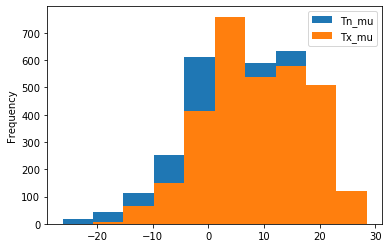

In [5]:
X_train[["Tn_mu","Tx_mu"]].plot.hist()

In [ ]:
plt.figure()
plt.scatter(X_train.index,y_train['U_mu'])

In [13]:
trainset = pd.concat([X_train,y_train],axis=1)
trainset = trainset.drop('OBSERVED',axis=1)
trainset.shape

(3140, 17)

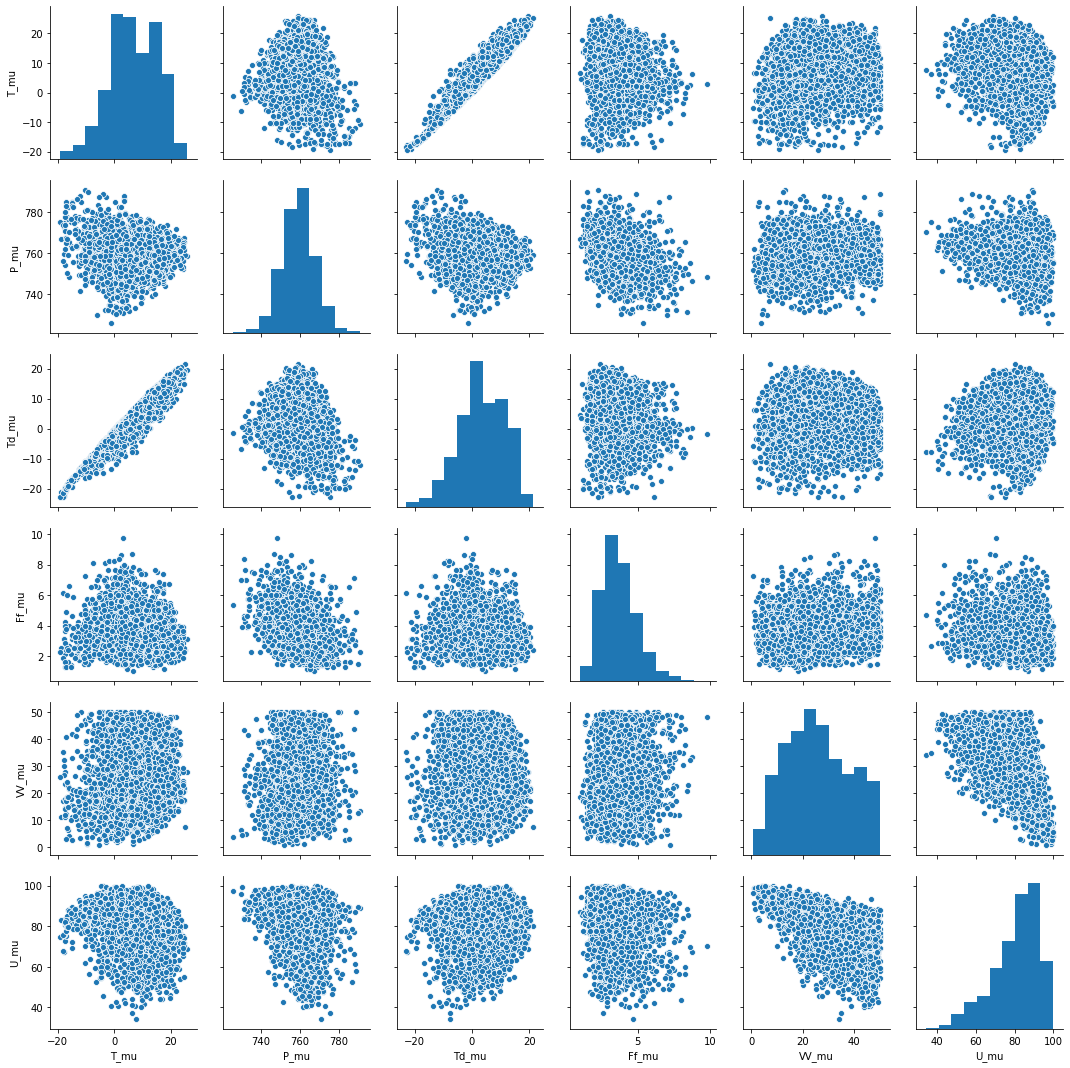

In [7]:
sns.pairplot(trainset[['T_mu', 'P_mu', 'Td_mu', 'Ff_mu', 'VV_mu','U_mu']])

In [13]:
cor = trainset[['T_mu', 'P_mu', 'Td_mu', 'Ff_mu', 'VV_mu','U_mu']].corr()
cor

,T_mu,P_mu,Td_mu,Ff_mu,VV_mu,U_mu
T_mu,1.000000,-0.064765,0.955727,-0.129089,0.197904,-0.260787
P_mu,-0.064765,1.000000,-0.147263,-0.335417,0.073194,-0.269277
Td_mu,0.955727,-0.147263,1.000000,-0.146730,0.021703,0.031993
Ff_mu,-0.129089,-0.335417,-0.146730,1.000000,0.109370,-0.057180
VV_mu,0.197904,0.073194,0.021703,0.109370,1.000000,-0.640893
U_mu,-0.260787,-0.269277,0.031993,-0.057180,-0.640893,1.000000


In [5]:
X_test=pd.read_csv('weather_data_test.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
X_test.shape
y_test=pd.read_csv('weather_data_test_labels.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
y_test.shape

(1346, 2)

In [30]:
# X_train1 = X_train[['T_var','Tn_var','Tx_mu','VV_mu']]
# X_test1 = X_test[['T_var','Tn_var','Tx_mu','VV_mu']]

(6.0, 0.0)

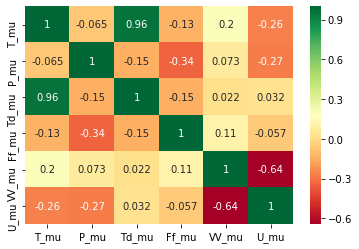

In [14]:
ax=sns.heatmap(cor,annot=True,linewidths=0,
    linecolor='white',cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
cor = trainset.corr()
cor


,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu
T_mu,1.000000,-0.063475,-0.064765,-0.129089,0.992020,0.993854,0.197904,0.955727,0.144131,-0.195955,-0.196021,-0.020912,0.211934,0.056675,-0.028513,-0.178432,-0.260787
Po_mu,-0.063475,1.000000,0.999989,-0.335656,-0.089972,-0.044090,0.073503,-0.146007,0.225118,-0.283857,-0.283139,-0.240412,0.125750,0.134974,-0.243616,0.023177,-0.269538
P_mu,-0.064765,0.999989,1.000000,-0.335417,-0.091260,-0.045372,0.073194,-0.147263,0.225030,-0.283367,-0.282725,-0.240176,0.125396,0.135071,-0.243537,0.023514,-0.269277
Ff_mu,-0.129089,-0.335656,-0.335417,1.000000,-0.101940,-0.149504,0.109370,-0.146730,-0.246450,0.361483,0.361153,0.409312,-0.174823,-0.126245,0.117640,0.110220,-0.057180
Tn_mu,0.992020,-0.089972,-0.091260,-0.101940,1.000000,0.979744,0.167064,0.961942,0.051036,-0.189527,-0.189645,-0.029570,0.165914,-0.010877,-0.028753,-0.230666,-0.213275
Tx_mu,0.993854,-0.044090,-0.045372,-0.149504,0.979744,1.000000,0.232505,0.934206,0.202114,-0.197900,-0.197961,-0.014669,0.244814,0.084765,-0.031387,-0.148372,-0.311506
VV_mu,0.197904,0.073503,0.073194,0.109370,0.167064,0.232505,1.000000,0.021703,0.221391,0.011147,0.011387,0.074889,0.149622,0.128403,0.109720,0.105754,-0.640893
Td_mu,0.955727,-0.146007,-0.147263,-0.146730,0.961942,0.934206,0.021703,1.000000,0.007482,-0.175056,-0.175116,-0.042787,0.104634,-0.013603,0.022393,-0.254667,0.031993
T_var,0.144131,0.225118,0.225030,-0.246450,0.051036,0.202114,0.221391,0.007482,1.000000,-0.073988,-0.073497,0.053374,0.581422,0.648124,-0.042451,0.465716,-0.442629
Po_var,-0.195955,-0.283857,-0.283367,0.361483,-0.189527,-0.197900,0.011147,-0.175056,-0.073988,1.000000,0.999595,0.358113,-0.046387,-0.023354,0.190429,0.144366,0.090748


In [56]:
cor_target = abs(cor["U_mu"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Tx_mu     0.311506
VV_mu     0.640893
T_var     0.442629
Tn_var    0.341580
U_mu      1.000000
Name: U_mu, dtype: float64

<font size=5>Linear Regression</font>

In [6]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
df = pd.DataFrame({'y_test':y_test['U_mu'],'y_pred':y_pred[:,1]})
df.head()




,y_test,y_pred
datetime,,
2015-09-03,93.875,93.735106
2015-09-04,88.500,89.319734
2015-09-05,85.250,86.280112
2015-09-06,91.375,91.108696
2015-09-07,94.500,93.278579


In [7]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred[:,1],y_test['U_mu']))
print('Mean Squared Error:',metrics.mean_squared_error(y_pred[:,1],y_test['U_mu']))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])))
print('r2_score:',metrics.r2_score(y_test['U_mu'], y_pred[:,1]))

Mean Absolute Error: 1.115719107185167
Mean Squared Error: 2.429568807698443
Root Mean Squared Error: 1.55870741568084
r2_score: 0.9849910138257622


In [8]:
coeff_df = pd.DataFrame(model.coef_[1], X_train.columns, columns=['Coefficient'])  
coeff_df.T

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
Coefficient,-4.378636,0.958574,-0.986676,-0.207551,0.278132,-0.337839,-0.06274,4.554419,0.056052,0.159684,-0.154022,-0.026436,0.044177,-0.008677,0.000828,0.046668


<font size=5>Polynomial Regression</font>

In [10]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
y_pred = lm_poly.predict(X_test_poly)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred[:,1],y_test['U_mu']))
print('Mean Squared Error:',metrics.mean_squared_error(y_pred[:,1],y_test['U_mu']))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])))
print('r2_score:',metrics.r2_score(y_test['U_mu'], y_pred[:,1]))

Mean Absolute Error: 0.33503229872943874
Mean Squared Error: 0.2761528939115445
Root Mean Squared Error: 0.5255025156091496
r2_score: 0.9982940285726584


<font size=5>PCA</font>

In [11]:
scale=StandardScaler().fit(X_train)
scaled_data = scale.transform(X_train)
#scale=StandardScaler().fit(X_test)
scaled_data1 = scale.transform(X_test)

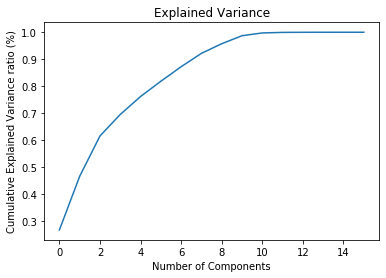

(16, 16)

In [12]:
pca = PCA()
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)
X_pca_test = pca.transform(scaled_data1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance ratio (%)') #for each component
plt.title('Explained Variance')
# plt.axhline(y=0.95, color='r', linestyle='-')
# plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
plt.show()
pca.components_.shape

In [13]:
# Build PCA dataframe with projections of data on eigenvectors
pca_df = pd.DataFrame()
for i in range(pca.components_.shape[1]):
        pca_df['PCA_cmp' + str(i + 1)] = pca.components_[i, :]@ scaled_data.T

# Display sample of PCA dataframe
pca_df.head(5)
#pca_df.corr().round(2).head()

,PCA_cmp1,PCA_cmp2,PCA_cmp3,PCA_cmp4,PCA_cmp5,PCA_cmp6,PCA_cmp7,PCA_cmp8,PCA_cmp9,PCA_cmp10,PCA_cmp11,PCA_cmp12,PCA_cmp13,PCA_cmp14,PCA_cmp15,PCA_cmp16
0,-1.597323,1.369902,-1.088322,-1.003837,0.527500,-0.603659,0.588842,0.580921,0.177896,0.217448,0.227034,0.095819,-0.000808,0.000531,0.001412,0.000490
1,-1.428895,0.770860,0.336219,0.431522,0.466703,-0.799210,-0.285562,-0.455824,0.317243,0.620918,0.141248,-0.088980,0.089914,-0.052191,0.026397,-0.005170
2,-2.115870,-0.344940,-0.487298,0.216391,1.061982,-0.461752,1.316505,-0.044602,-0.408506,0.263015,0.370009,-0.017431,0.025087,-0.025849,0.006260,-0.001444
3,-2.132857,-1.227838,-0.654058,0.276633,1.298859,-0.919950,1.416722,0.256507,-0.094864,0.344554,0.137375,0.005964,0.094157,0.041283,-0.002626,0.002315
4,-1.925155,-0.537394,-0.815135,0.667565,0.994975,0.007075,0.837961,0.575342,0.185913,0.350180,0.035047,-0.092426,0.013965,-0.002003,-0.000618,0.000223


In [14]:

explained_variance = pca.explained_variance_ratio_
explained_variance.round(2)



array([0.27, 0.2 , 0.15, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [15]:
exp_df=pd.DataFrame({'Explained Variance':pca.explained_variance_.round(2),
                    'Explained Variance Ratio':pca.explained_variance_ratio_.round(2)},index=["P" + str(i) for i in range(1,17)]).T
exp_df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
Explained Variance,4.30,3.18,2.39,1.27,1.06,0.90,0.86,0.79,0.57,0.48,0.16,0.03,0.01,0.0,0.0,0.0
Explained Variance Ratio,0.27,0.20,0.15,0.08,0.07,0.06,0.05,0.05,0.04,0.03,0.01,0.00,0.00,0.0,0.0,0.0


In [16]:
# Helper function to explain variance
def explain_variance(orig_var, pca_var):
    orig_var_total = sum(orig_var)
    pca_var_total = sum(pca_var)

    # cumsum()
    orig_cum = np.cumsum(orig_var)
    pca_cum = np.cumsum(pca_var)

    # turn cumsum() to percentages
    orig_cum = [x / orig_var_total for x in orig_cum]
    pca_cum = [x / pca_var_total for x in pca_cum]
    
    for i in range(len(pca_cum)):
        print(f'Percentage covered by PCA with {i+1} dimension: {pca_cum[i]}')

    print('Original var cumsum\n', orig_cum)
    print('Var cumsum after pca\n', pca_cum)

    f, ax = plt.subplots()
    ax.plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance')
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance')
    plt.xlabel("No: of components")
    plt.ylabel("Cumulative Explained Variance Ratio")
    plt.legend(loc='best')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.show()    

Orig_var: [0.03631958043296118, 0.017238384729092903, 0.017236418465670027, 0.01951100767763329, 0.03033767212944611, 0.038434359049325365, 0.06135556678947593, 0.033185140393346337, 0.006232624281355867, 0.004532034773629273, 0.004493866863111049, 0.005108354844433719, 0.005619023272554667, 0.0031815578719238996, 0.0273070819820077, 0.003373106861471047]
PCA_var: [4.29746623620822, 3.1788627940036323, 2.387290725409193, 1.2739943443583162, 1.0619397308928957, 0.9041949304469205, 0.8604459439620261, 0.7918530886712243, 0.5685837348762354, 0.4763638141377444, 0.16298674183072798, 0.03150938337181882, 0.007164756393710346, 0.0020276432642955303, 0.00040662145631487566, 6.675418870335016e-06]
Percentage covered by PCA with 1 dimension: 0.2685061010242356
Percentage covered by PCA with 2 dimension: 0.46712175210658824
Percentage covered by PCA with 3 dimension: 0.6162799047152556
Percentage covered by PCA with 4 dimension: 0.695879193069968
Percentage covered by PCA with 5 dimension: 0.762

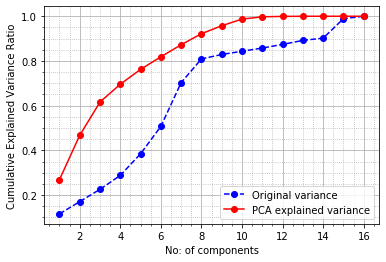

In [17]:
# To compare variances, we have to normalize original data
X_norm = (X_train - X_train.min(axis=0))/(X_train.max(axis=0) - X_train.min(axis=0))
# Compute variances by column
orig_var = X_norm.var().tolist()
pca_var = pca_df.var().tolist()

print('Orig_var:',orig_var)
print('PCA_var:',pca_var)
explain_variance(orig_var, pca_var)


<font size=5>Linear Regression after PCA</font>

In [39]:
pca = PCA(n_components=14)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)
X_pca_test = pca.transform(scaled_data1)
model3= LinearRegression()
model3.fit(X_pca,y_train)
y_pred = model3.predict(X_pca_test)
df = pd.DataFrame({'y_test':y_test['U_mu'],'y_pred':y_pred[:,1]})
df.head()
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred[:,1],y_test['U_mu']))
print('Mean Squared Error:',metrics.mean_squared_error(y_pred[:,1],y_test['U_mu']))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])))
print('r2_score:',metrics.r2_score(y_test['U_mu'], y_pred[:,1]) * 100)

Mean Absolute Error: 1.1159556479254518
Mean Squared Error: 2.4313853810226553
Root Mean Squared Error: 1.5592900246659231
r2_score: 98.49797917011526


<font size=5>Polynomial Regression after PCA</font>

In [40]:
poly = PolynomialFeatures(degree=2) 
X_train_poly_pca = poly.fit_transform(X_pca)
X_test_poly_pca = poly.transform(X_pca_test)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly_pca, y_train)
y_pred = lm_poly.predict(X_test_poly_pca)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred[:,1],y_test['U_mu']))
print('Mean Squared Error:',metrics.mean_squared_error(y_pred[:,1],y_test['U_mu']))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])))
print('r2_score:',metrics.r2_score(y_test['U_mu'], y_pred[:,1]) * 100)

Mean Absolute Error: 0.3330505630391912
Mean Squared Error: 0.27405067106350617
Root Mean Squared Error: 0.5234984919400496
r2_score: 99.83070153353964


In [51]:
def performance_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    mean_absolute_error     = metrics.mean_absolute_error(y_pred,y_test)
    mean_squared_error = metrics.mean_squared_error(y_pred,y_test)
    #root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
    r2_score = metrics.r2_score(y_test, y_pred)
    df_model = pd.DataFrame({'model'        : [name],
                             'mean_absolute_error'     : [mean_absolute_error],
                             'mean_squared_error'    : [mean_squared_error],
                             #'root_mean_squared_error'       : [root_mean_squared_error],
                             'r2_score':[r2_score]
                                 })   # timetaken for comparison later
    return df_model

# to evaluate baseline models
logit = LinearRegression()
# modl = Lasso()
# knn = KNeighborsRegressor()
# to concat all models
df_models = pd.concat([performance_report(logit, X_train, X_test, y_train['U_mu'], y_test['U_mu'], 'Linear Regression'),
                       #performance_report(modl,X_train, X_test, y_train['U_mu'], y_test['U_mu'], 'Lasso Regression'),
                       
                       
                       performance_report(logit,X_train_poly, X_test_poly, y_train['U_mu'], y_test['U_mu'], 'Linear Regression using polynomial features'),
                       performance_report(logit,X_pca, X_pca_test, y_train['U_mu'], y_test['U_mu'], 'Linear Regression after PCA'),
                       performance_report(logit,X_train_poly_pca, X_test_poly_pca, y_train['U_mu'], y_test['U_mu'], 'Linear Regression using polynomial features after PCA')
                       ], axis=0).reset_index()
# outside=['Before PCA','Before PCA','After PCA''After PCA']
# inside=[0,1,2,3]
# hier_index=list(zip(outside,inside))
# hier_index=pd.MultiIndex.from_tuples(hier_index)
df_models = df_models.drop('index', axis=1)
df_models

,model,mean_absolute_error,mean_squared_error,r2_score
0,Linear Regression,1.115719,2.429569,0.984991
1,Linear Regression using polynomial features,0.335032,0.276153,0.998294
2,Linear Regression after PCA,1.115956,2.431385,0.984980
3,Linear Regression using polynomial features af...,0.333051,0.274051,0.998307


In [98]:
error_list=[]
r2_score=[]
def mod(model,X_train,X_test):
    scale=StandardScaler()
    for i in range(1,17):
        pca = PCA(n_components=i)
        pca.fit(scale.fit_transform(X_train))
        X_pca = pca.transform(scale.fit_transform(X_train))
        X_pca_test = pca.transform(scale.transform(X_test))
        model.fit(X_pca,y_train)
        y_pred = model.predict(X_pca_test)
        error=metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])
        r2=metrics.r2_score(y_test['U_mu'], y_pred[:,1])
       # comp_df.append()
        error_list.append(error)
        r2_score.append(r2)
    return error_list,r2_score

d=mod(LinearRegression(),X_train,X_test)
comp_df=pd.DataFrame()
comp_df['No: of Components']= [i for i in range(1,17)]
comp_df['MSE']=error_list
comp_df['r2_score']=r2_score
comp_df.set_index('No: of Components',inplace=True)
columns = pd.MultiIndex.from_product([['Linear Regression'], ['MSE', 'r2_score']],names=['Model', 'Metric'])
comp_df.columns=columns
comp_df

Model             Linear Regression          
Metric                          MSE  r2_score
No: of Components                            
1                        151.187292  0.066020
2                        143.295384  0.114774
3                        109.927897  0.320906
4                        108.541024  0.329473
5                         98.999317  0.388418
6                         84.891354  0.475572
7                         83.680696  0.483051
8                         71.012182  0.561313
9                         70.639498  0.563615
10                        69.776827  0.568944
11                        68.945335  0.574081
12                         4.266165  0.973645
13                         4.270585  0.973618
14                         2.431385  0.984980
15                         2.430982  0.984982
16                         2.429569  0.984991

In [99]:
error_list1=[]
r2_score1=[]
def mod(model,X_train,X_test):
    scale=StandardScaler()
    for i in range(1,17):
        pca = PCA(n_components=i)
        pca.fit(scale.fit_transform(X_train))
        X_pca = pca.transform(scale.fit_transform(X_train))
        X_pca_test = pca.transform(scale.transform(X_test))
        
        poly = PolynomialFeatures(degree=2) 
        X_train_poly_pca = poly.fit_transform(X_pca)
        X_test_poly_pca = poly.transform(X_pca_test)
        model.fit(X_train_poly_pca,y_train)
        y_pred = model.predict(X_test_poly_pca)
        error1=metrics.mean_squared_error(y_pred[:,1],y_test['U_mu'])
        r21=metrics.r2_score(y_test['U_mu'], y_pred[:,1])
       # comp_df.append()
        error_list1.append(error1)
        r2_score1.append(r21)
    return error_list1,r2_score1

d=mod(LinearRegression(),X_train,X_test)
comp_df1=pd.DataFrame()

#columns = pd.MultiIndex.from_product([['Linear Regression'], ['MSE', 'r2_score']],names=['Model', 'Metric'])
comp_df1['No: of Components']= [i for i in range(1,17)]
comp_df1['MSE']=error_list1
comp_df1['r2_score']=r2_score1
comp_df1.set_index('No: of Components',inplace=True)
columns = pd.MultiIndex.from_product([['Polynomial Regression'], ['MSE', 'r2_score']],names=['Model', 'Metric'])
comp_df1.columns=columns
comp_df1


Model             Polynomial Regression          
Metric                              MSE  r2_score
No: of Components                                
1                            146.708501  0.093689
2                            134.327282  0.170175
3                             99.891564  0.382907
4                             99.355614  0.386217
5                             90.140144  0.443147
6                             73.287107  0.547259
7                             70.422234  0.564957
8                             57.955656  0.641971
9                             56.162771  0.653047
10                            54.120207  0.665665
11                            53.547067  0.669206
12                             2.688737  0.983390
13                             2.308180  0.985741
14                             0.274051  0.998307
15                             0.276142  0.998294
16                             0.276153  0.998294

In [100]:

df_comp = pd.concat([comp_df,comp_df1],axis=1)
df_comp

Model             Linear Regression           Polynomial Regression          
Metric                          MSE  r2_score                   MSE  r2_score
No: of Components                                                            
1                        151.187292  0.066020            146.708501  0.093689
2                        143.295384  0.114774            134.327282  0.170175
3                        109.927897  0.320906             99.891564  0.382907
4                        108.541024  0.329473             99.355614  0.386217
5                         98.999317  0.388418             90.140144  0.443147
6                         84.891354  0.475572             73.287107  0.547259
7                         83.680696  0.483051             70.422234  0.564957
8                         71.012182  0.561313             57.955656  0.641971
9                         70.639498  0.563615             56.162771  0.653047
10                        69.776827  0.568944             54.120207  0.665665
11                        68.945335  0.574081             53.547067  0.669206
12                         4.266165  0.973645              2.688737  0.983390
13                         4.270585  0.973618              2.308180  0.985741
14                         2.431385  0.984980              0.274051  0.998307
15                         2.430982  0.984982              0.276142  0.998294
16                         2.429569  0.984991              0.276153  0.998294

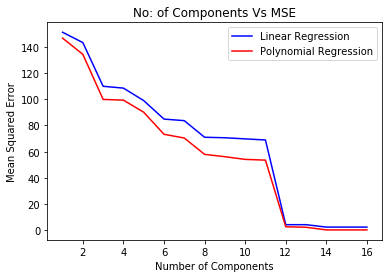

In [85]:
plt.figure()
plt.plot(range(1,17),error_list,'-b',label='Linear Regression')
plt.plot(range(1,17),error_list1,'-r',label='Polynomial Regression')
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error') #for each component
plt.title('No: of Components Vs MSE')
plt.show()

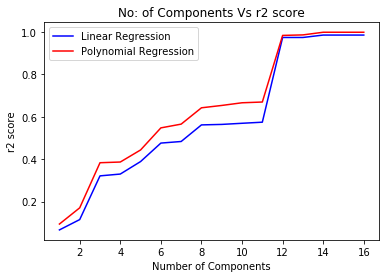

In [84]:
plt.figure()
plt.plot(range(1,17),r2_score,'-b',label='Linear Regression')
plt.plot(range(1,17),r2_score1,'-r',label='Polynomial Regression')
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('r2 score') #for each component
plt.title('No: of Components Vs r2 score')
plt.show()